In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import sys
import os
from collections import OrderedDict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib
import xgboost as xgb

sys.path.append('..')
from data import FEATURES
from evaluation import *
from plotting import plot_feature_ranking
from env_config import DATA_PATH

/mnt/home/snakoneczny/tools/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

sns.set(style='ticks')
sns.set_palette('cubehelix')

In [4]:
# TODO: remove
from data import read_fits_to_pandas
def add_z_b(preds):
    kids_x_sdss = read_fits_to_pandas(os.path.join(DATA_PATH, 'KiDS/DR4/KiDS.DR4.x.SDSS.DR14.fits'), ['ID', 'Z_B'])
    return preds.merge(kids_x_sdss, on=['ID'])

# Latest experiments on DR4 with redshift

## XGB clf + ANN z

In [5]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-05-13_12:45:37.csv')
preds_z = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_ann_f-all_test-magnitude__2019-05-13_16:17:04.csv')

In [6]:
preds_clf['Z_PHOTO'] = preds_z['Z_PHOTO']

In [7]:
preds_clf = add_z_b(preds_clf)

Multiclass classification results:
Accuracy = 0.9757
F1 per class = [0.9906 0.9449 0.931 ]
Logloss = 0.0975


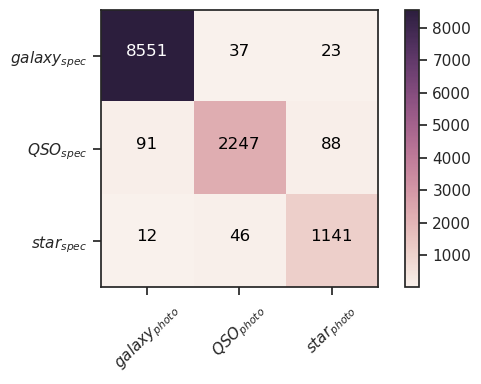

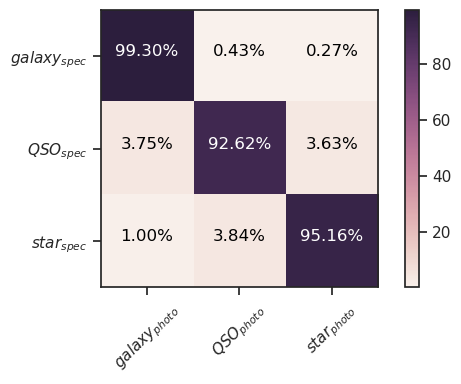

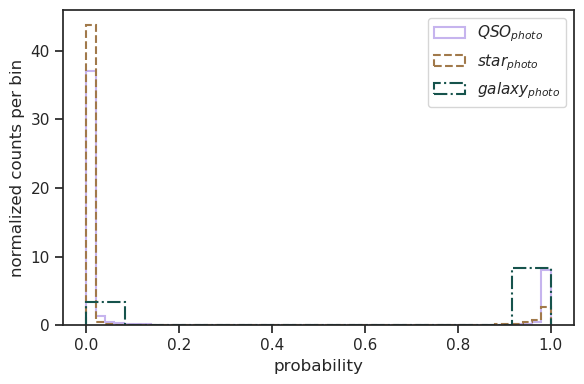

Binary classification results:
Predicted positives: 2330/12236 (19.04%)
Logloss = 0.0820
Accuracy = 0.9786
F1 = 0.9449
Precision = 0.9644
Recall = 0.9262
ROC AUC = 0.9899


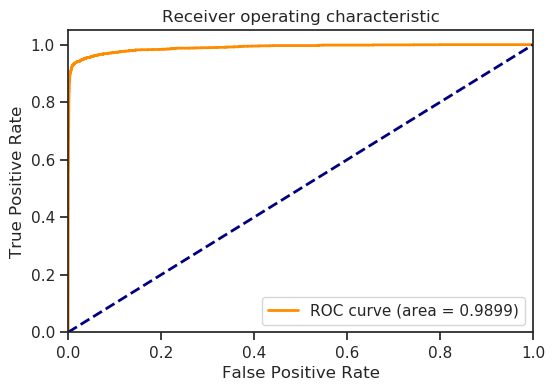

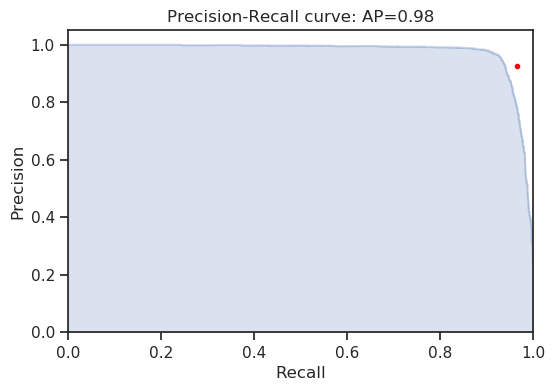

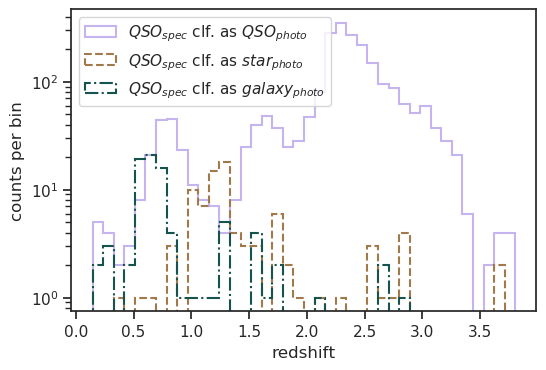

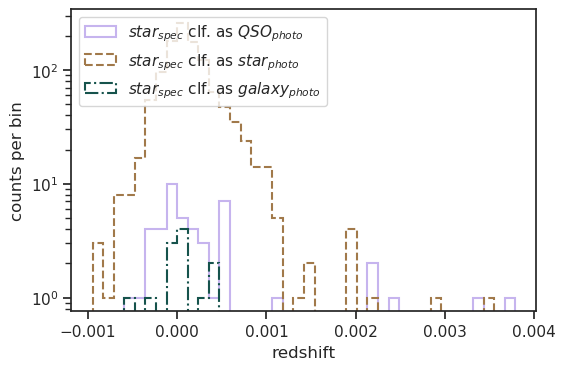

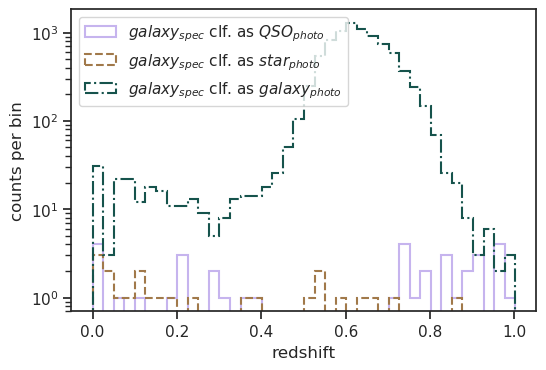

MSE: 0.0975
GALAXY: 0.0114, QSO: 0.369, STAR: 0.1666
GALAXY photo: 0.0245, QSO photo: 0.3067, STAR photo: 0.2131
R2: 0.826
GALAXY: 0.0468, QSO: 0.1705, STAR: -1060006.0766
GALAXY photo: 0.1579, QSO photo: 0.3358, STAR photo: -0.2362
rel. error: 0.0169
GALAXY: 0.0185, QSO: -0.041, STAR: 0.122
GALAXY photo: 0.0168, QSO photo: 0.0139, STAR photo: 0.0231
rel. error std: 0.1725
GALAXY: 0.0807, QSO: 0.2078, STAR: 0.3897
GALAXY photo: 0.0727, QSO photo: 0.3084, STAR photo: 0.2781


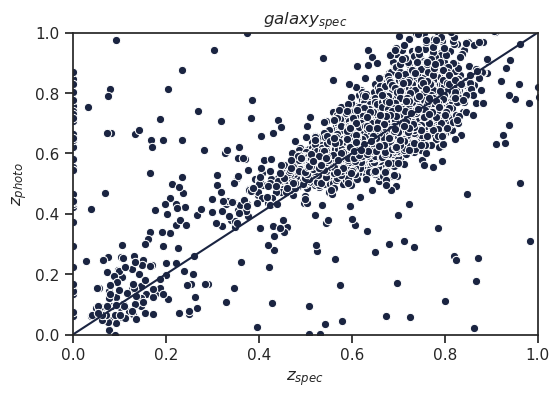

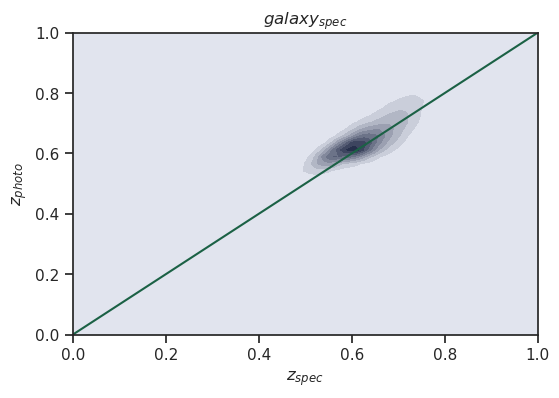

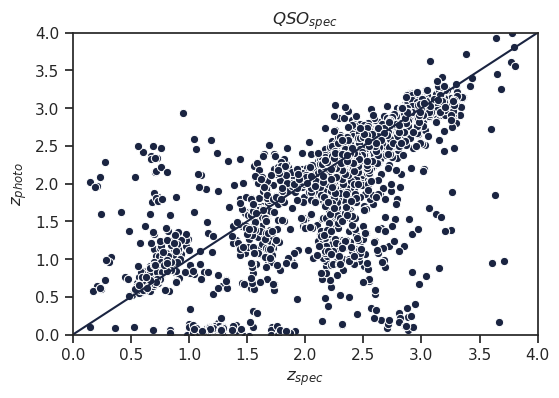

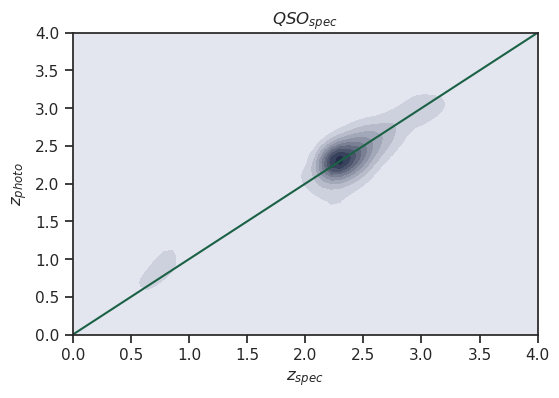

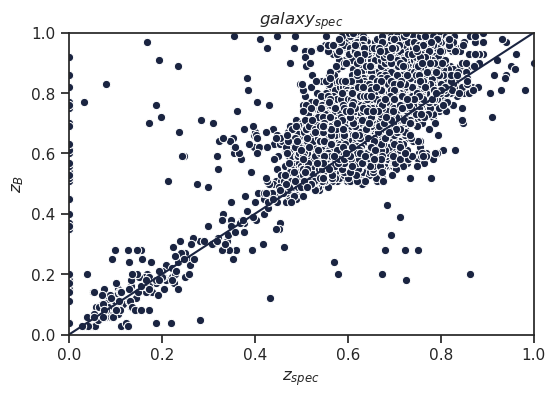

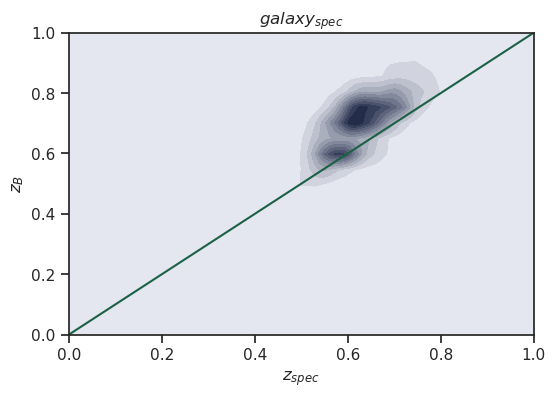

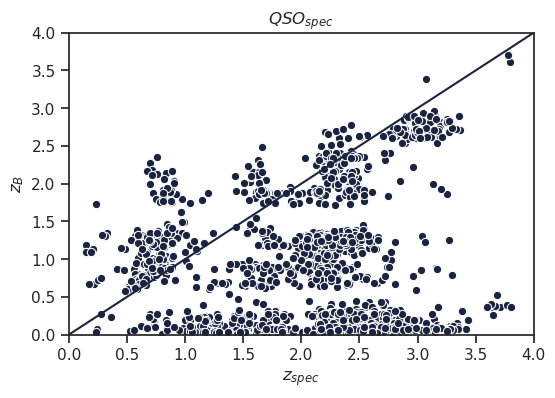

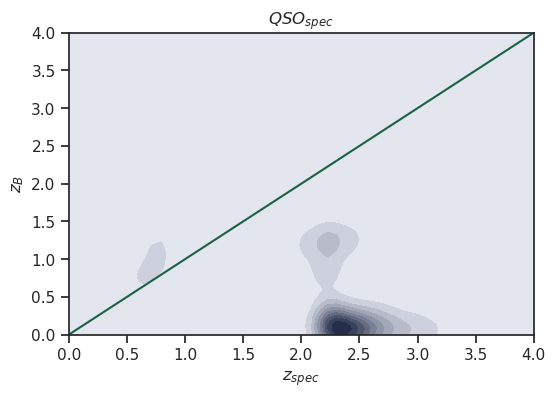

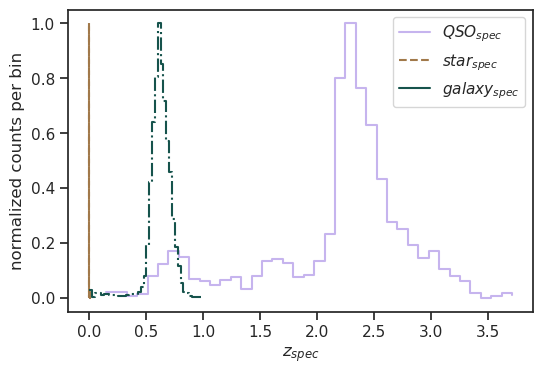

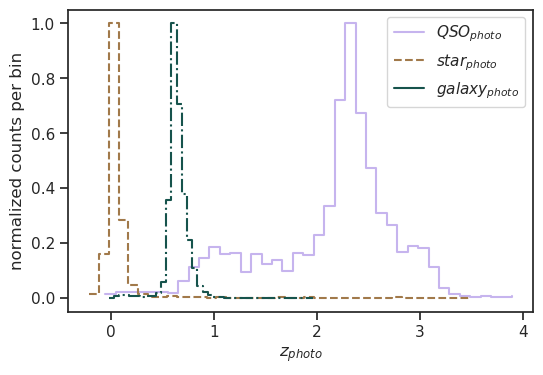

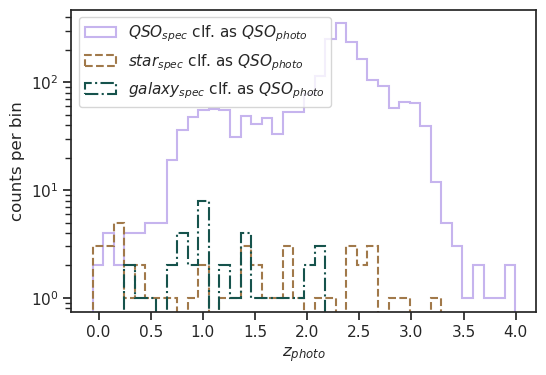

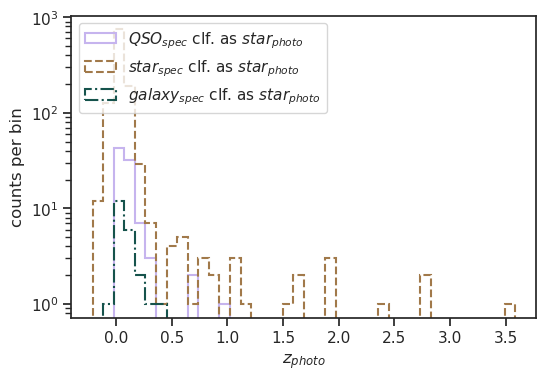

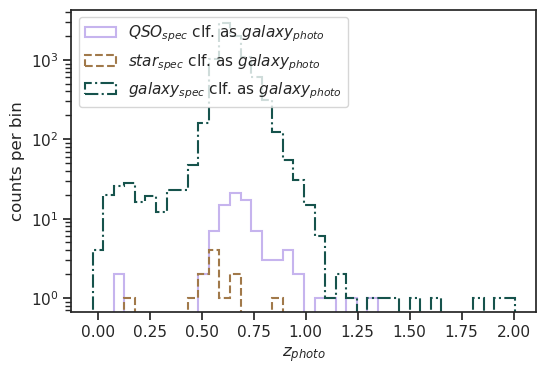

../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

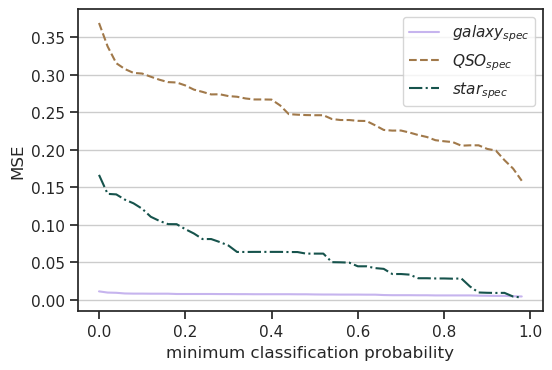

../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

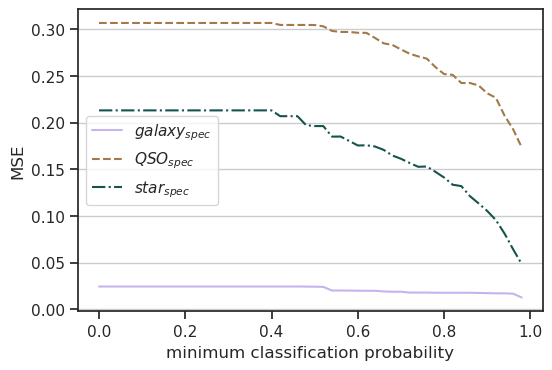

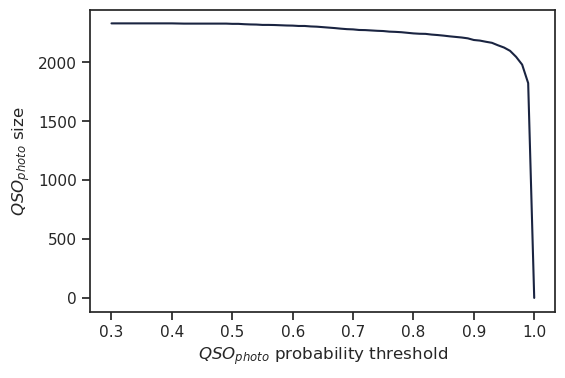

In [17]:
experiment_report(preds_clf, z_max=4)

## Artificial Neural Network (seperate for clf and z)

In [18]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_ann_f-all_test-magnitude__2019-05-13_16:09:37.csv')
preds_z = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_ann_f-all_test-magnitude__2019-05-13_16:17:04.csv')

In [19]:
preds_clf['Z_PHOTO'] = preds_z['Z_PHOTO']

In [20]:
preds_clf = add_z_b(preds_clf)

Multiclass classification results:
Accuracy = 0.9721
F1 per class = [0.9887 0.9359 0.9255]
Logloss = 0.1093


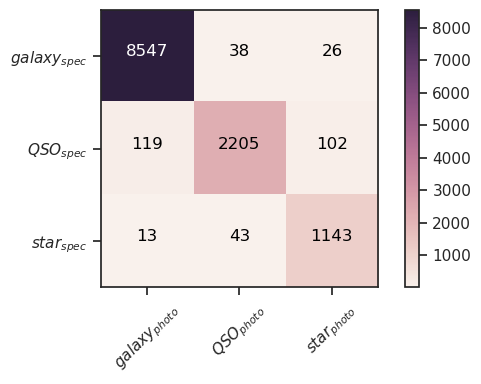

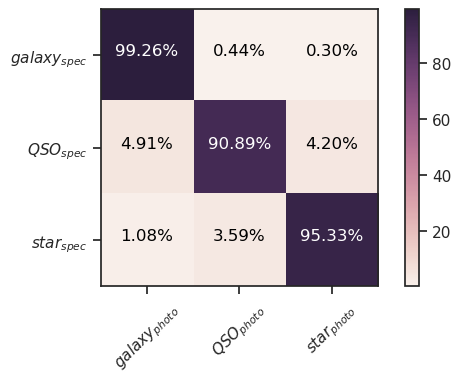

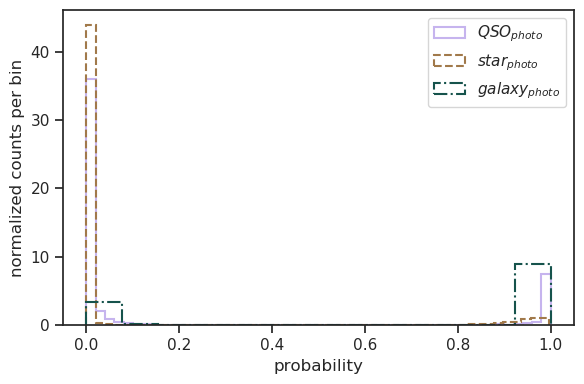

Binary classification results:
Predicted positives: 2286/12236 (18.68%)
Logloss = 0.0914
Accuracy = 0.9753
F1 = 0.9359
Precision = 0.9646
Recall = 0.9089
ROC AUC = 0.9865


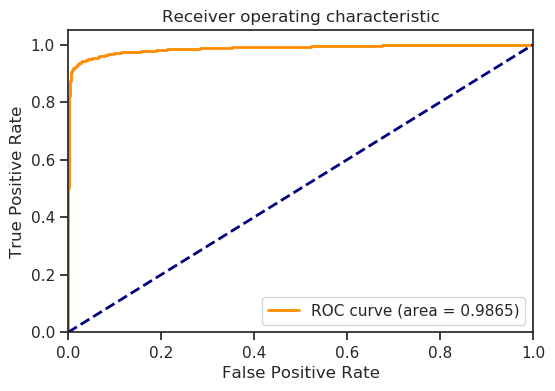

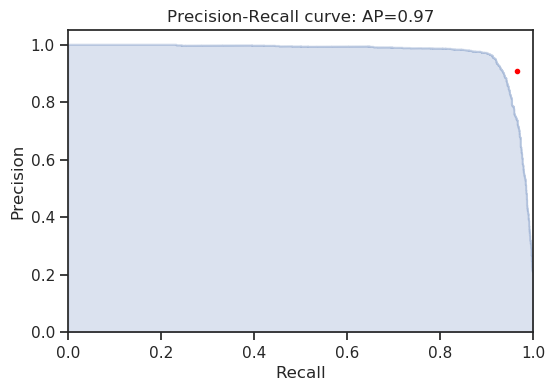

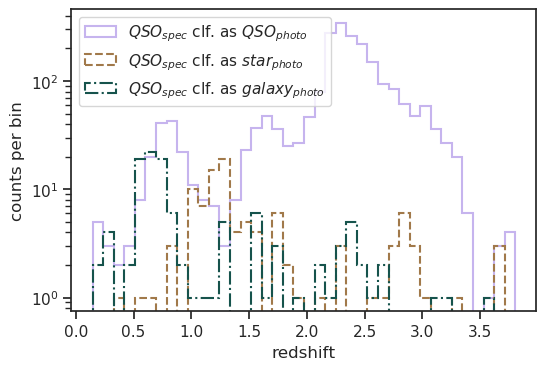

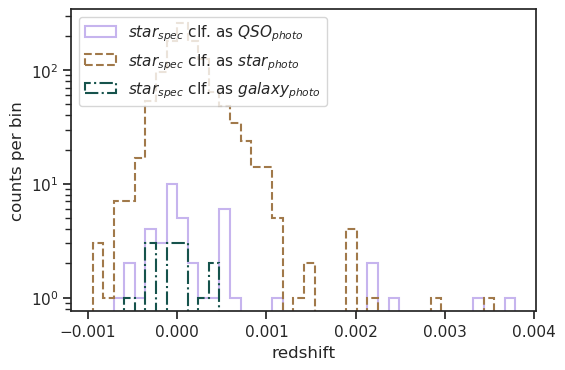

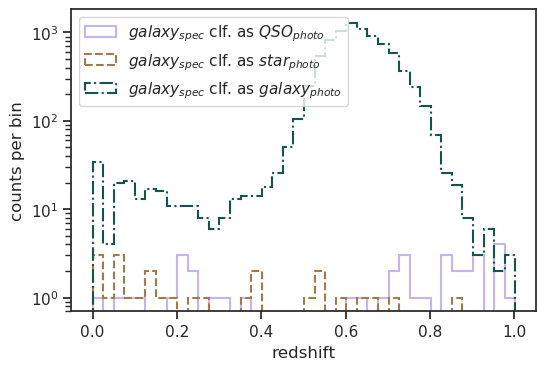

MSE: 0.0975
GALAXY: 0.0114, QSO: 0.369, STAR: 0.1666
GALAXY photo: 0.0275, QSO photo: 0.2771, STAR photo: 0.2526
R2: 0.826
GALAXY: 0.0468, QSO: 0.1705, STAR: -1060006.0766
GALAXY photo: 0.2729, QSO photo: 0.3804, STAR photo: -0.0592
rel. error: 0.0169
GALAXY: 0.0185, QSO: -0.041, STAR: 0.122
GALAXY photo: 0.0165, QSO photo: 0.0149, STAR photo: 0.0224
rel. error std: 0.1725
GALAXY: 0.0807, QSO: 0.2078, STAR: 0.3897
GALAXY photo: 0.0767, QSO photo: 0.2978, STAR photo: 0.2947


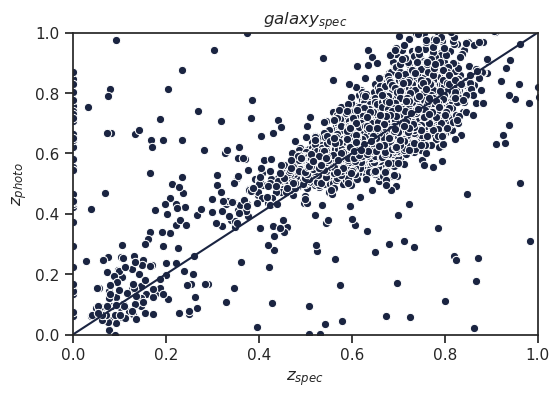

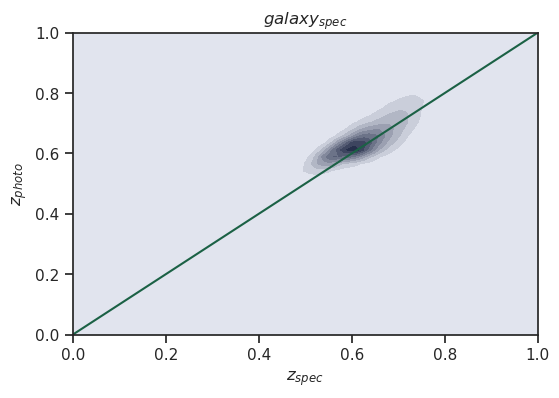

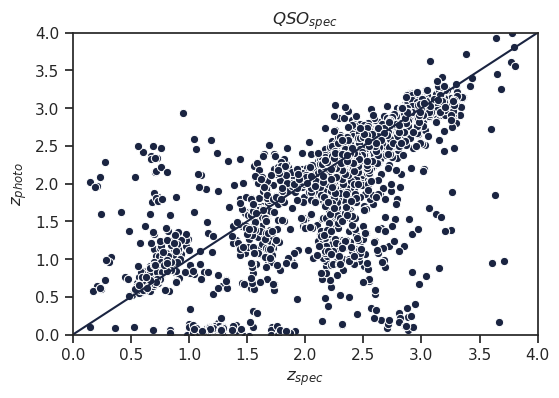

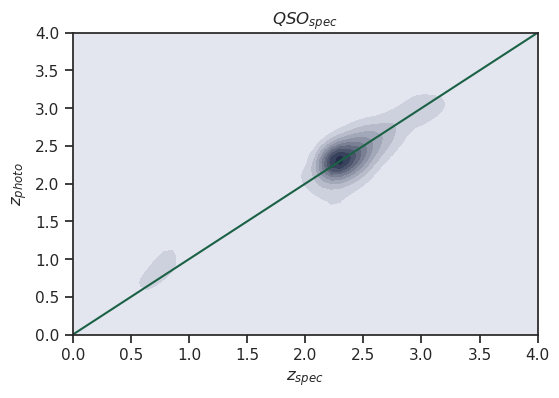

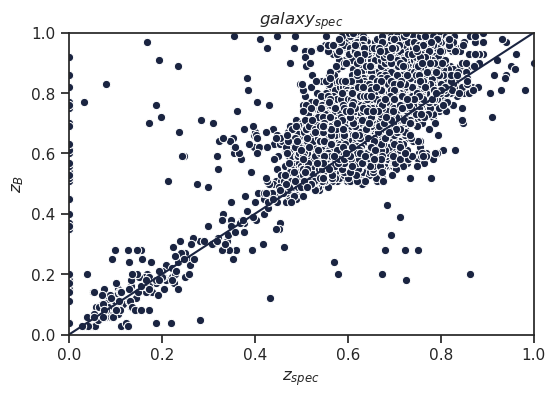

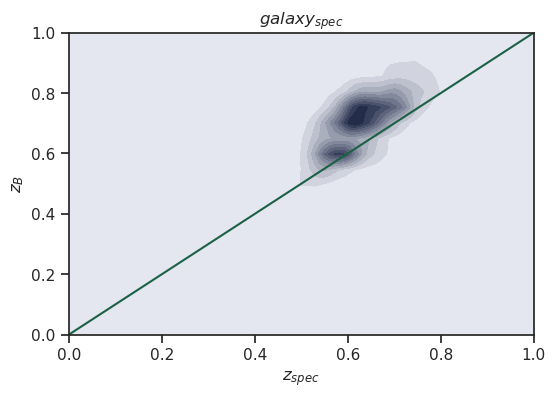

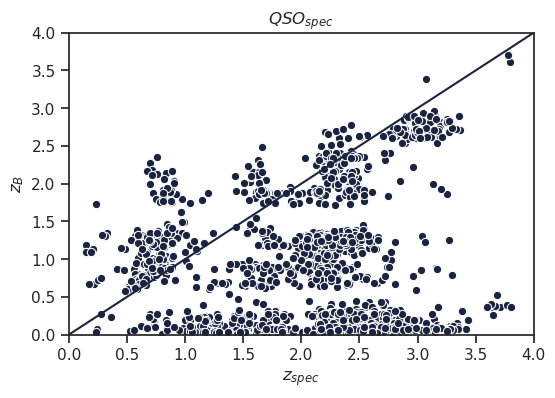

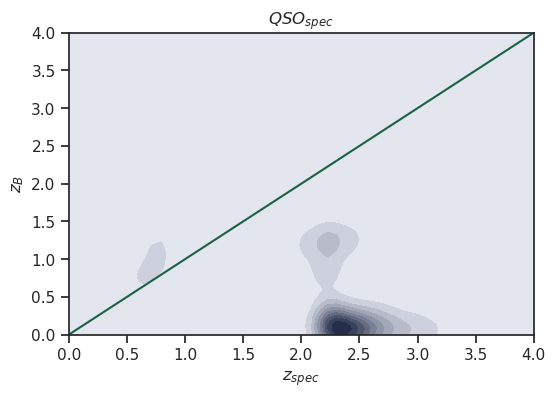

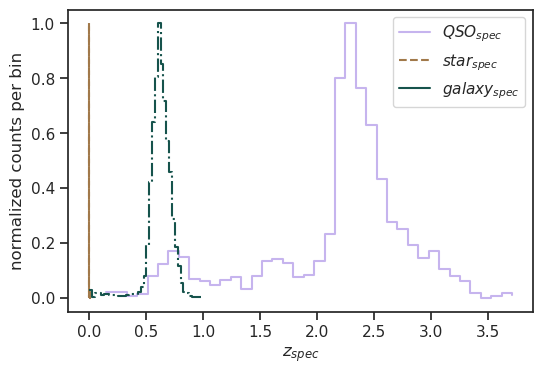

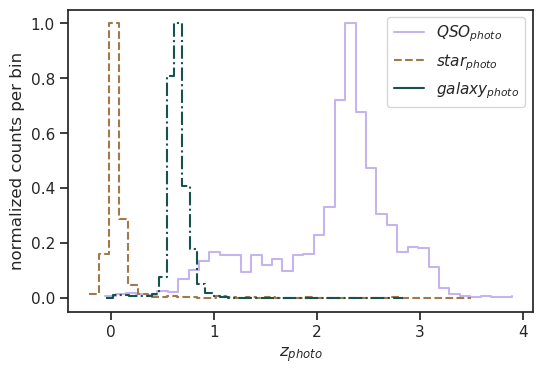

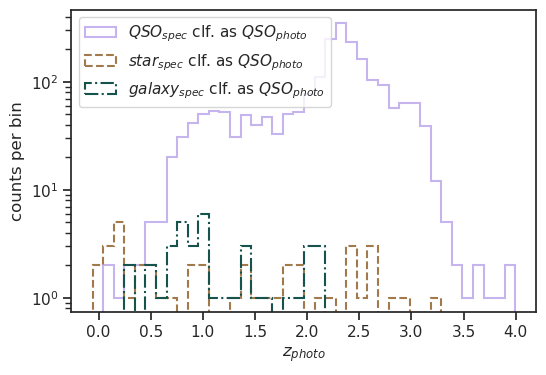

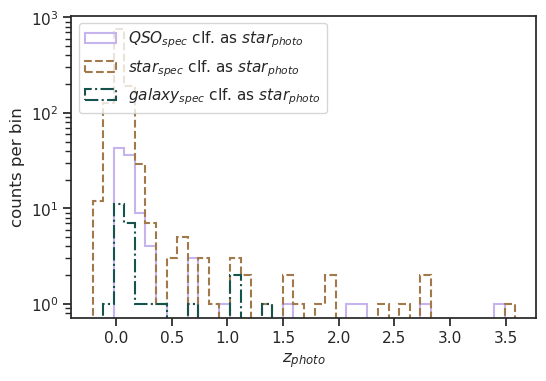

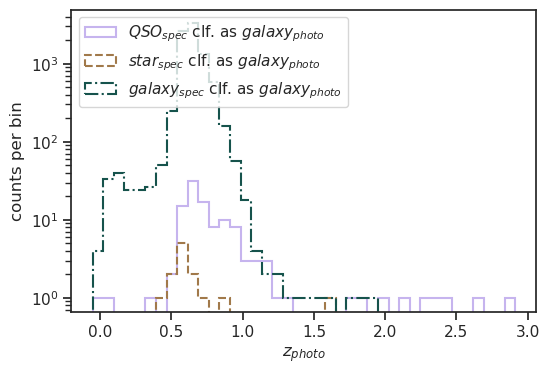

../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

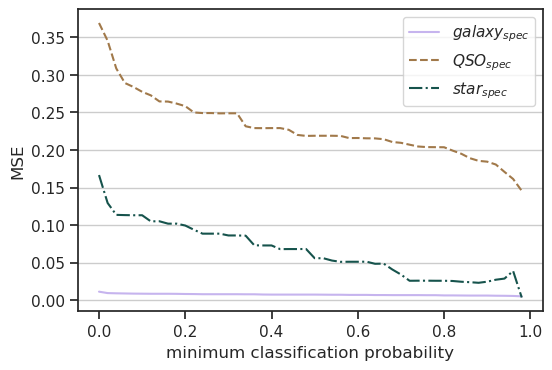

../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

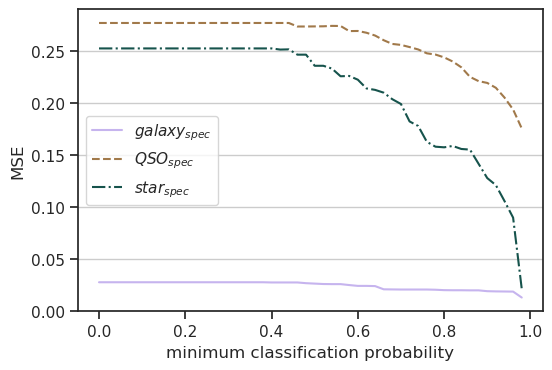

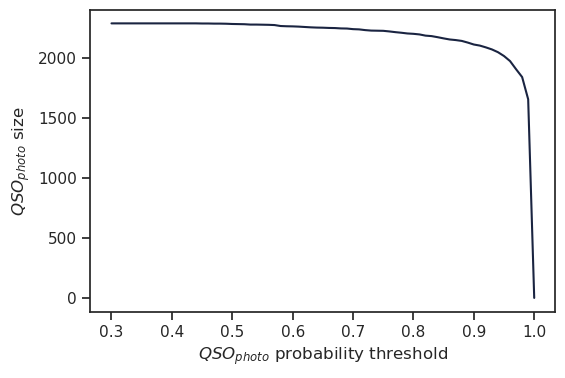

In [21]:
experiment_report(preds_clf, z_max=4)

## XGBoost

In [22]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-05-13_12:45:37.csv')
model_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-05-13_12:45:37.joblib')

/mnt/home/snakoneczny/tools/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.0 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [23]:
preds_z = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-05-13_13:09:48.csv')
model_z = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude__2019-05-13_13:09:48.joblib')

[14:56:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [24]:
model_clf.get_booster().feature_names = FEATURES['all']
model_z.get_booster().feature_names = FEATURES['all']

In [25]:
preds_clf['Z_PHOTO'] = preds_z['Z_PHOTO']

In [26]:
preds_clf = add_z_b(preds_clf)

Multiclass classification results:
Accuracy = 0.9757
F1 per class = [0.9906 0.9449 0.931 ]
Logloss = 0.0975


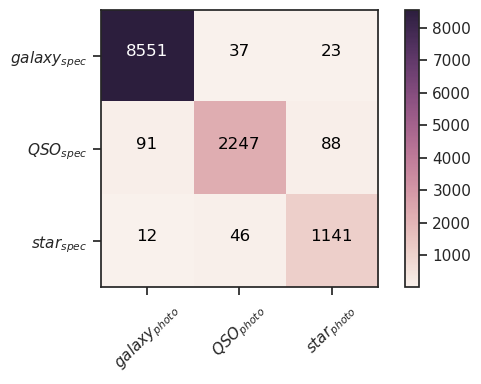

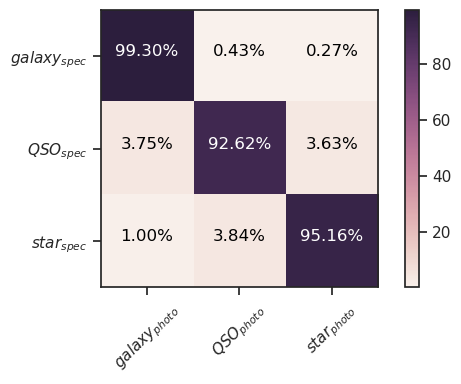

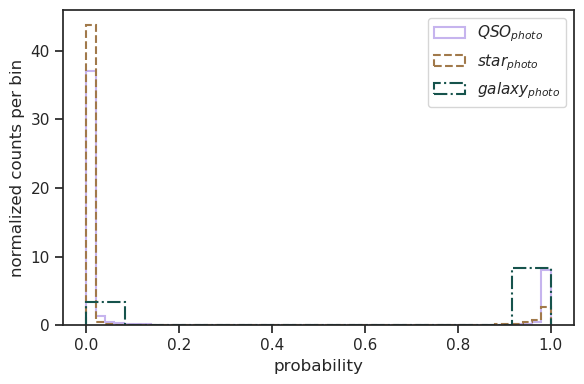

Binary classification results:
Predicted positives: 2330/12236 (19.04%)
Logloss = 0.0820
Accuracy = 0.9786
F1 = 0.9449
Precision = 0.9644
Recall = 0.9262
ROC AUC = 0.9899


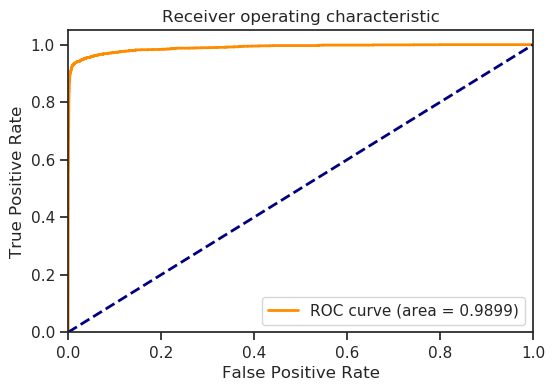

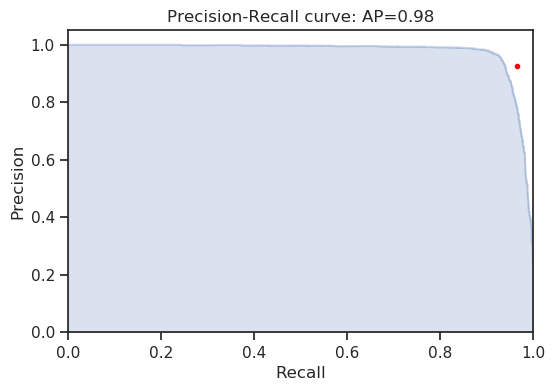

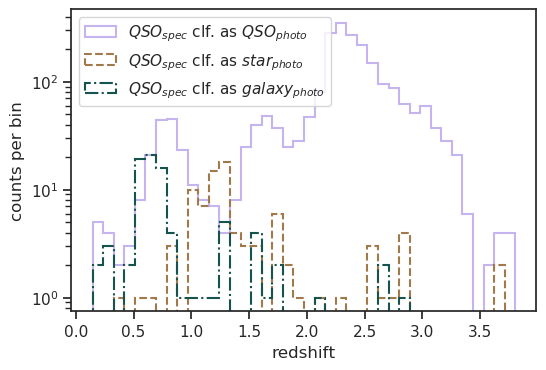

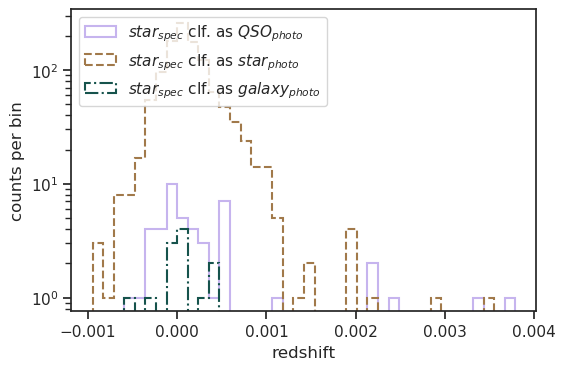

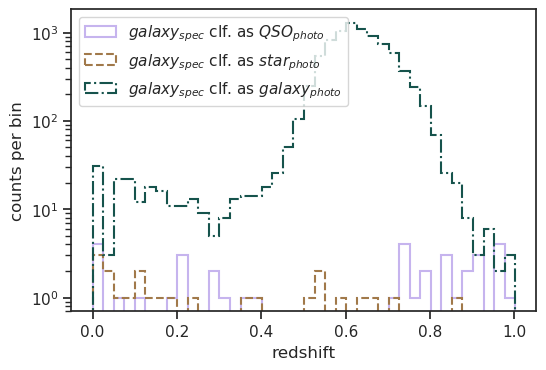

MSE: 0.0999
GALAXY: 0.0168, QSO: 0.3144, STAR: 0.2619
GALAXY photo: 0.0292, QSO photo: 0.2793, STAR photo: 0.2546
R2: 0.8219
GALAXY: -0.4078, QSO: 0.2932, STAR: -1665748.2944
GALAXY photo: -0.0033, QSO photo: 0.3952, STAR photo: -0.4769
rel. error: 0.0275
GALAXY: 0.0101, QSO: -0.0252, STAR: 0.2588
GALAXY photo: 0.0077, QSO photo: 0.0354, STAR photo: 0.1494
rel. error std: 0.201
GALAXY: 0.1038, QSO: 0.1972, STAR: 0.4415
GALAXY photo: 0.0934, QSO photo: 0.3117, STAR photo: 0.3689


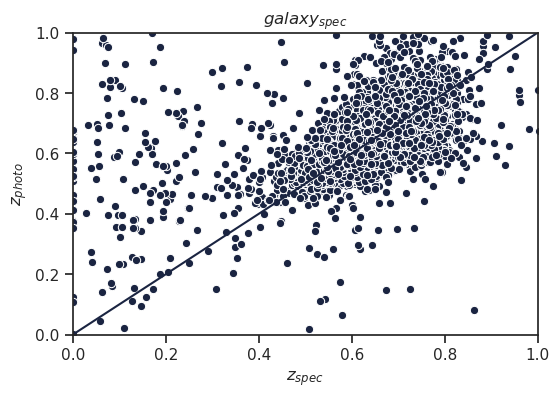

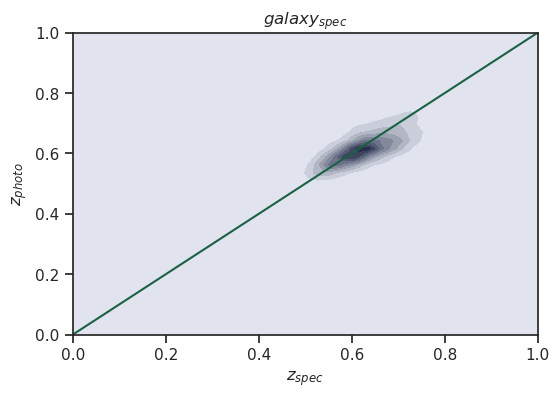

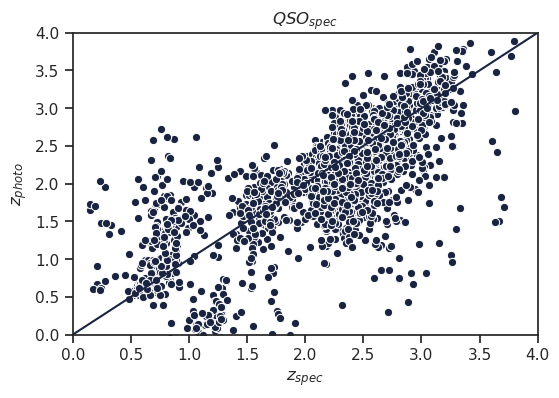

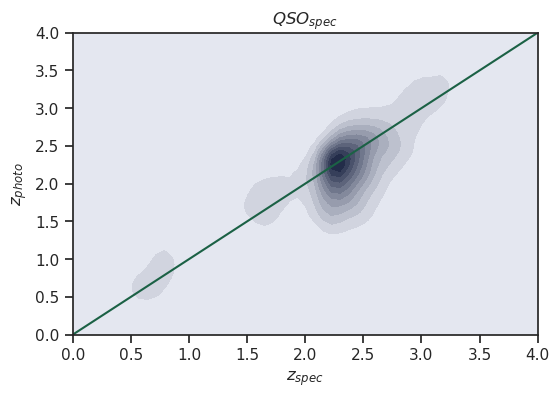

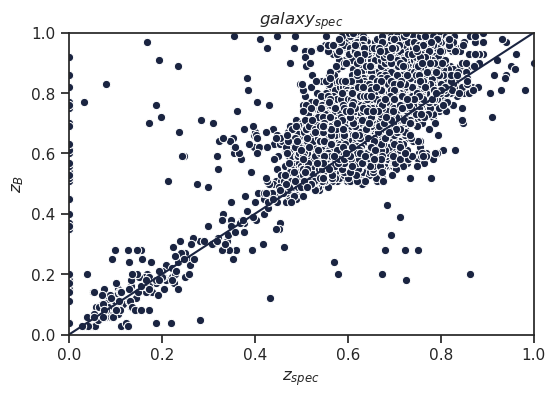

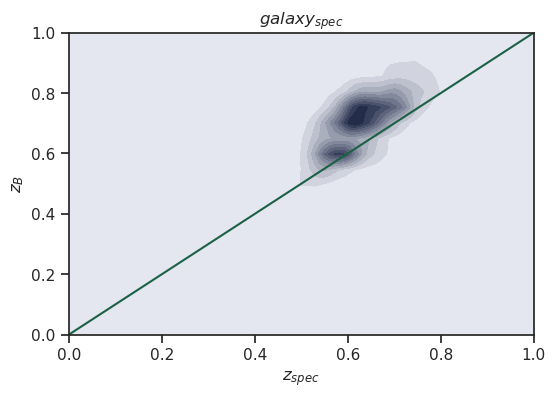

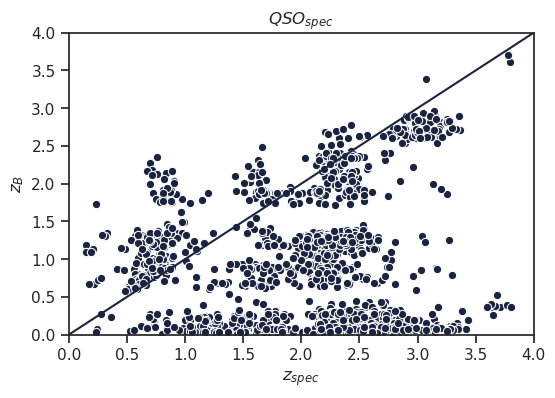

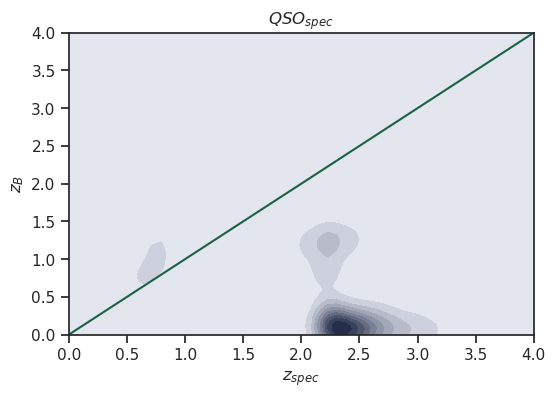

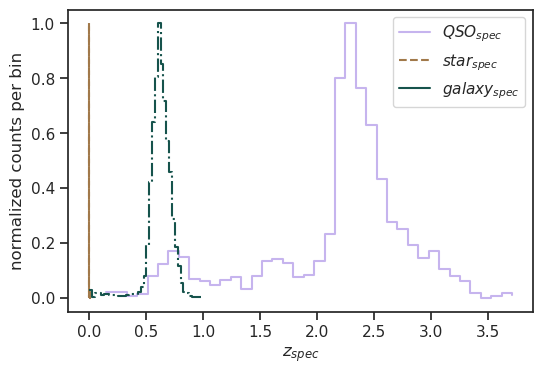

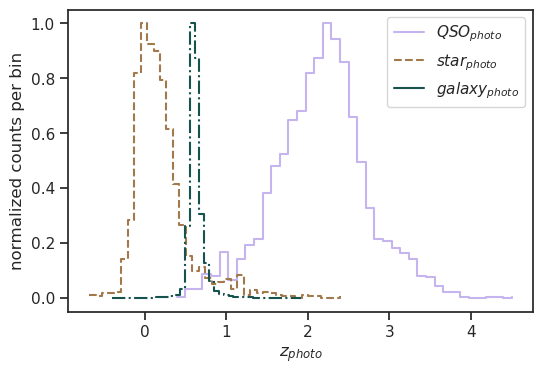

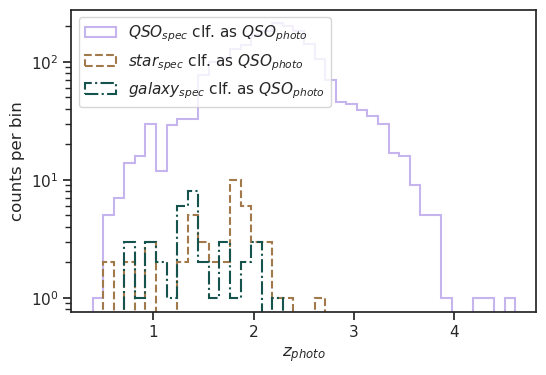

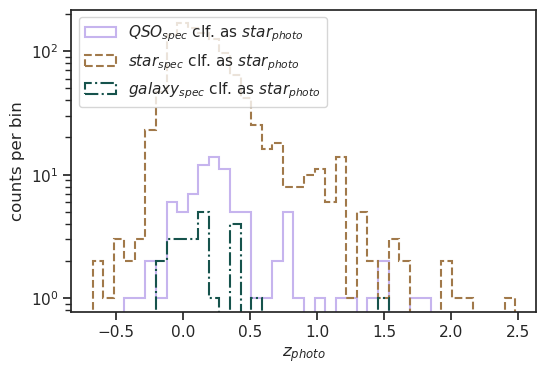

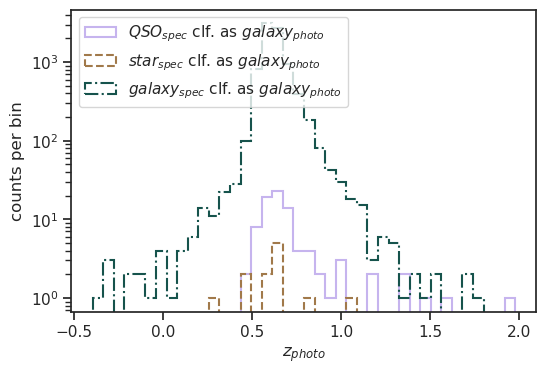

../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

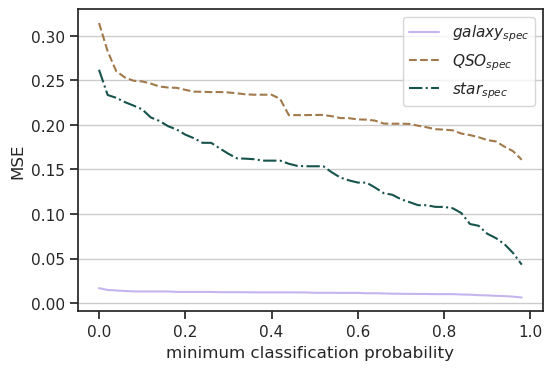

../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.xlabel('minimum classification probability')
../evaluation.py:286: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always

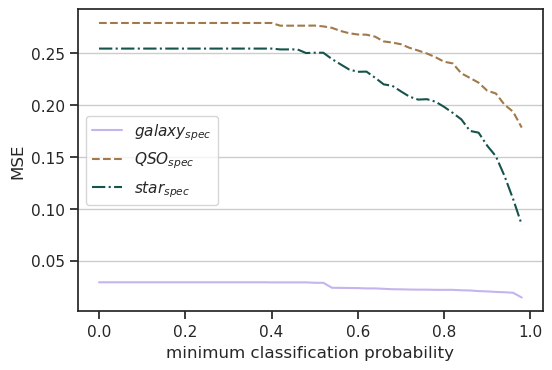

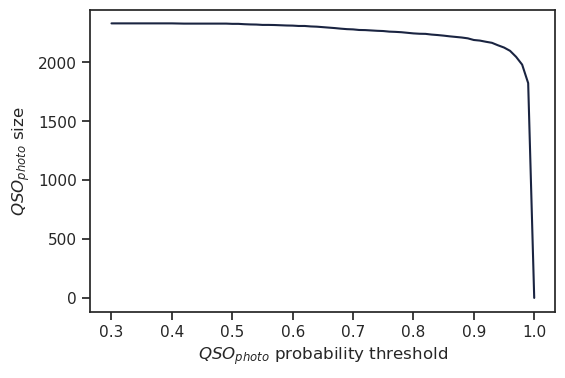

In [27]:
experiment_report(preds_clf, z_max=4)

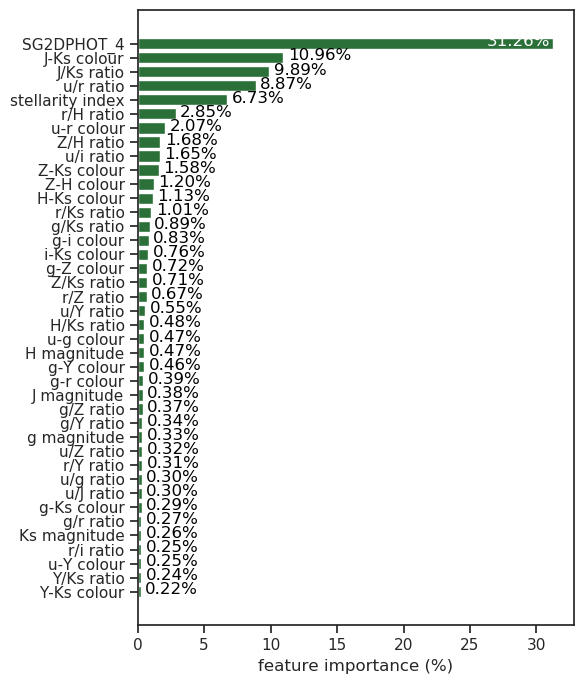

In [28]:
plot_feature_ranking(model_clf, FEATURES['all'], model_type='xgb')

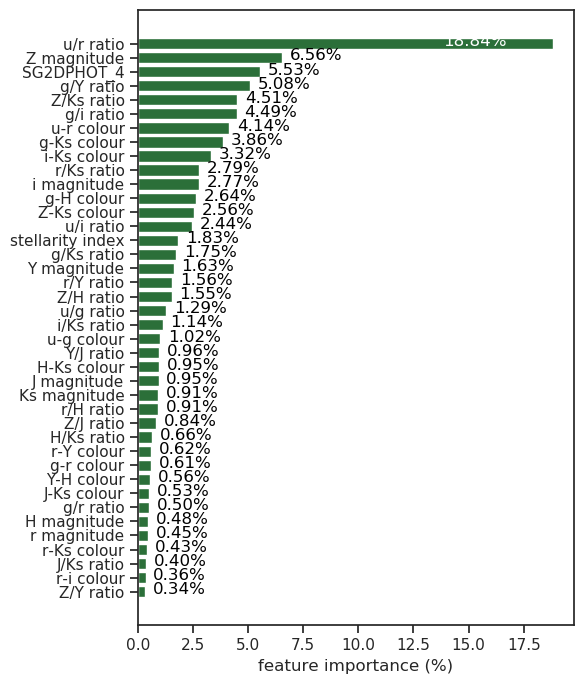

In [29]:
plot_feature_ranking(model_z, FEATURES['all'], model_type='xgb')

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

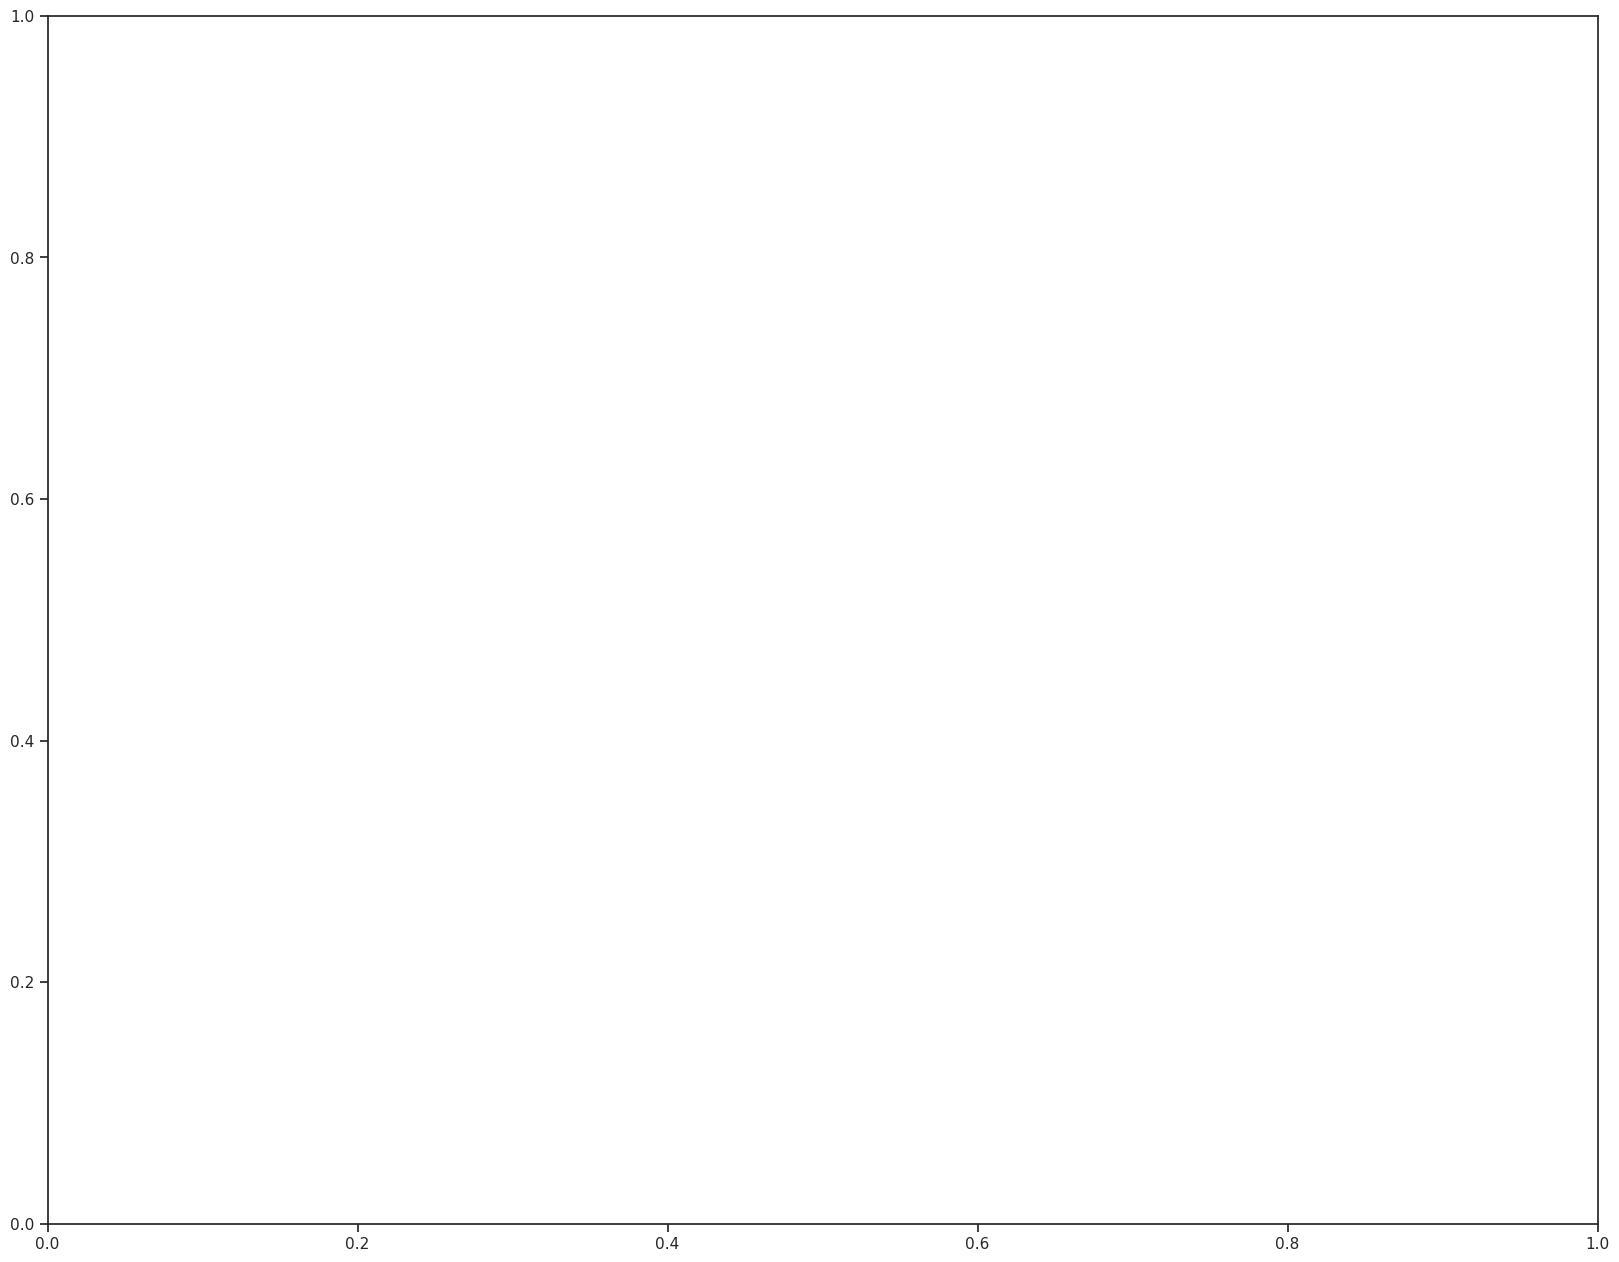

In [30]:
fig, ax = plt.subplots(figsize=(20, 16))
xgb.plot_tree(model_z, ax=ax)  # to_graphviz

### Specialized redshift models

In [ ]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-05-13_13:10:12.csv')

preds_z_galaxy = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude_spec-galaxy__2019-06-07_12:57:55.csv')
model_z_galaxy = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude_spec-galaxy__2019-06-07_12:57:55.joblib')

preds_z_qso = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude_spec-qso__2019-06-07_11:47:36.csv')
model_z_qso = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_xgb_f-all_test-magnitude_spec-qso__2019-06-07_11:47:36.joblib')

In [ ]:
# Z_PHOTO_SDSS (vanilla)
preds_clf.loc[preds_clf['CLASS'] == 'GALAXY', 'Z_PHOTO'] = preds_z_galaxy.loc[preds_z_galaxy['CLASS'] == 'GALAXY', 'Z_PHOTO']
preds_clf.loc[preds_clf['CLASS'] == 'QSO', 'Z_PHOTO'] = preds_z_qso.loc[preds_z_qso['CLASS'] == 'QSO', 'Z_PHOTO']
preds_clf.loc[preds_clf['CLASS'] == 'STAR', 'Z_PHOTO'] = 0

In [ ]:
preds_clf = add_z_b(preds_clf)

In [ ]:
experiment_report(preds_clf, z_max=4)

In [ ]:
# Z_PHOTO
preds_clf.loc[preds_clf['CLASS_PHOTO'] == 'GALAXY', 'Z_PHOTO'] = preds_z_galaxy.loc[preds_clf['CLASS_PHOTO'] == 'GALAXY', 'Z_PHOTO']
preds_clf.loc[preds_clf['CLASS_PHOTO'] == 'QSO', 'Z_PHOTO'] = preds_z_qso.loc[preds_clf['CLASS_PHOTO'] == 'QSO', 'Z_PHOTO']
preds_clf.loc[preds_clf['CLASS_PHOTO'] == 'STAR', 'Z_PHOTO'] = 0

In [ ]:
experiment_report(preds_clf, z_max=4)

In [ ]:
model_z_galaxy.get_booster().feature_names = FEATURES['all']
plot_feature_ranking(model_z_galaxy, FEATURES['all'], model_type='xgb')

In [ ]:
model_z_qso.get_booster().feature_names = FEATURES['all']
plot_feature_ranking(model_z_qso, FEATURES['all'], model_type='xgb')

## Random Forest

In [ ]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-05-13_13:10:12.csv')
model_clf = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-05-13_13:10:12.joblib')

In [ ]:
preds_z = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-05-13_13:10:30.csv')
model_z = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-05-13_13:10:30.joblib')

In [ ]:
preds_clf['Z_PHOTO'] = preds_z['Z_PHOTO']

In [ ]:
preds_clf = add_z_b(preds_clf)

In [ ]:
experiment_report(preds_clf, z_max=4)

In [ ]:
plot_feature_ranking(model_clf, FEATURES['all'])

In [ ]:
plot_feature_ranking(model_z, FEATURES['all'])

### Specialized redshift models

In [ ]:
preds_clf = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitude__2019-05-13_13:10:12.csv')

preds_z_galaxy = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitudespec-GALAXY__2019-06-05_16:23:41.csv')
model_z_galaxy = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitudespec-GALAXY__2019-06-05_16:23:41.joblib')

preds_z_qso = pd.read_csv('../outputs/exp_preds/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitudespec-qso__2019-06-05_16:31:40.csv')
model_z_qso = joblib.load('../outputs/exp_models/KiDS_DR4_x_SDSS_DR14_rf_f-all_test-magnitudespec-qso__2019-06-05_16:31:40.joblib')

In [ ]:
# Z_PHOTO_SDSS (vanilla)
preds_clf.loc[preds_clf['CLASS'] == 'GALAXY', 'Z_PHOTO'] = preds_z_galaxy.loc[preds_z_galaxy['CLASS'] == 'GALAXY', 'Z_PHOTO']
preds_clf.loc[preds_clf['CLASS'] == 'QSO', 'Z_PHOTO'] = preds_z_qso.loc[preds_z_qso['CLASS'] == 'QSO', 'Z_PHOTO']
preds_clf.loc[preds_clf['CLASS'] == 'STAR', 'Z_PHOTO'] = 0

In [ ]:
preds_clf = add_z_b(preds_clf)

In [ ]:
experiment_report(preds_clf, z_max=4)

In [ ]:
# Z_PHOTO
preds_clf.loc[preds_clf['CLASS_PHOTO'] == 'GALAXY', 'Z_PHOTO'] = preds_z_galaxy.loc[preds_clf['CLASS_PHOTO'] == 'GALAXY', 'Z_PHOTO']
preds_clf.loc[preds_clf['CLASS_PHOTO'] == 'QSO', 'Z_PHOTO'] = preds_z_qso.loc[preds_clf['CLASS_PHOTO'] == 'QSO', 'Z_PHOTO']
preds_clf.loc[preds_clf['CLASS_PHOTO'] == 'STAR', 'Z_PHOTO'] = 0

In [ ]:
experiment_report(preds_clf, z_max=4)

In [ ]:
plot_feature_ranking(model_z_galaxy, FEATURES['all'])

In [ ]:
plot_feature_ranking(model_z_qso, FEATURES['all'])

# DR3

## KiDS (mags + colors) vs. colors

In [13]:
preds_1 = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_cleaned_rcut__2018-03-05_14:13:44.csv')
preds_2 = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_cleaned_colors_cut__2018-03-05_13:59:06.csv')

In [14]:
id_intersection = np.intersect1d(preds_1['ID'], preds_2['ID'])
set_intersection = preds_1.loc[preds_1['ID'].isin(id_intersection)]
id_intersection.shape

(23188,)

In [15]:
print(np.unique(preds_1['CLASS'], return_counts=True))
print(np.unique(preds_2['CLASS'], return_counts=True))
print(np.unique(set_intersection['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12089,  4352,  7329]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12090,  4098,  7231]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12071,  3911,  7206]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9417
F1 per class = [0.9696 0.8699 0.9335]


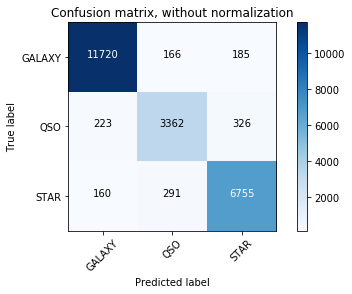

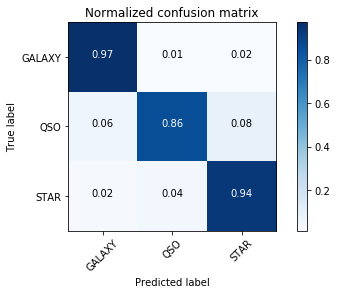

Binary classification results:
Predicted positives: 3819/23188 (16.47%)
logloss = 0.1573
ROC AUC = 0.9782


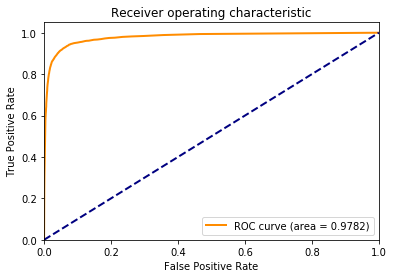

recall = 0.8596
accuracy = 0.9566
precision = 0.8803
f1 = 0.8699


In [16]:
classification_report(preds_1.loc[preds_1['ID'].isin(id_intersection)])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9311
F1 per class = [0.9636 0.8473 0.9217]


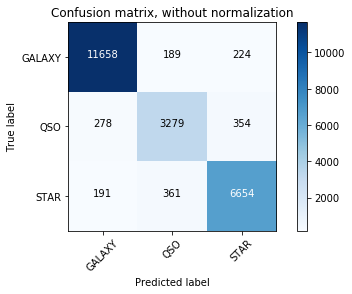

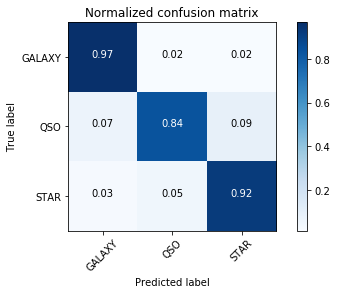

Binary classification results:
Predicted positives: 3829/23188 (16.51%)
logloss = 0.2087
ROC AUC = 0.9679


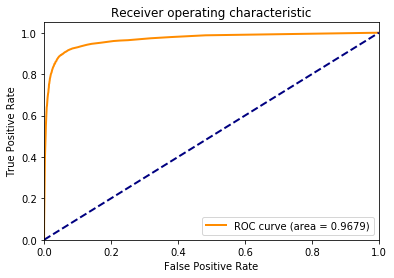

recall = 0.8384
accuracy = 0.9490
precision = 0.8564
f1 = 0.8473


In [17]:
classification_report(preds_2.loc[preds_2['ID'].isin(id_intersection)])

## Astronet
SDSS cleaned, mags+colors+class_star, R cut, all tiles

In [69]:
preds_star = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_astronet_f-all_cut-r__2018-08-03_17:07:55.csv')
# predictions = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_astronet_f-all_cut-r__2018-08-03_16:41:18.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'

Multiclass classification results:
Accuracy = 0.9353
F1 per class = [0.2368 0.9143 0.9532]
Logloss = 0.2187


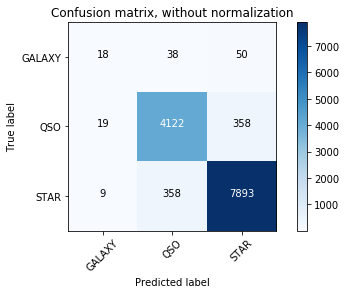

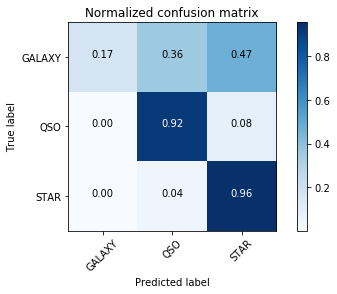

Binary classification results:
Predicted positives: 4518/12865 (35.12%)
logloss = 0.1812
ROC AUC = 0.9799


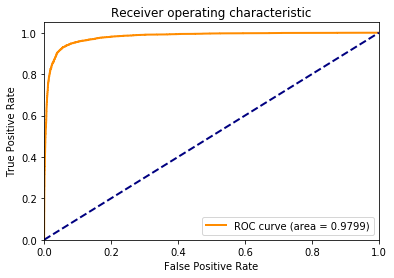

accuracy = 0.9399
f1 = 0.9143
precision = 0.9124
recall = 0.9162


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


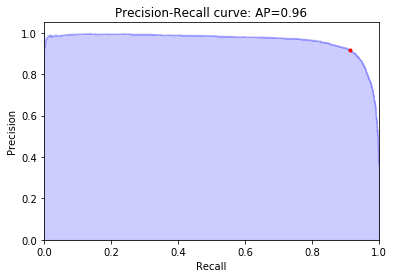

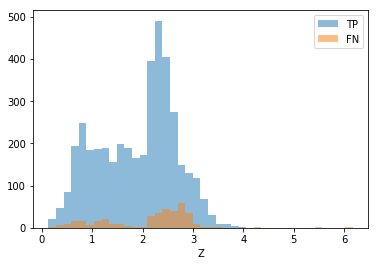

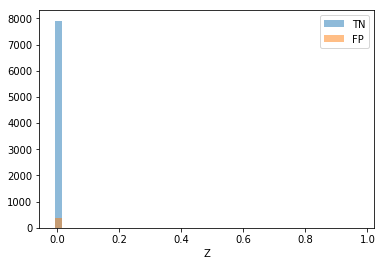

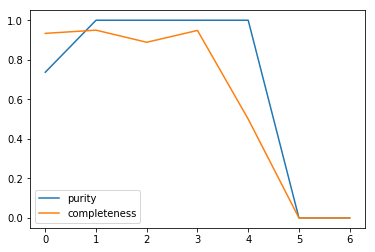

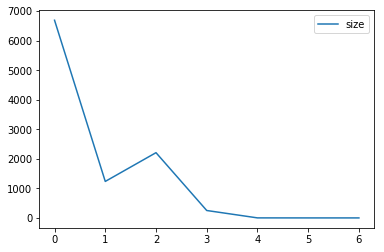

In [71]:
classification_report(preds_star)

In [ ]:
redshift_report(preds_star, data_path)

In [42]:
redshift_report(preds_star)

0.3013878945129163
binned
(-0.00795, 0.492]    8447
(0.492, 0.992]        706
(0.992, 1.492]        624
(1.492, 1.992]        616
(1.992, 2.492]       1394
(2.492, 2.992]        815
(2.992, 3.492]        238
(3.492, 3.992]         20
(3.992, 4.492]          2
(4.492, 4.992]          0
(4.992, 5.492]          0
(5.492, 5.992]          1
(5.992, 6.492]          1
dtype: int64
binned
(-0.00795, 0.492]    0.180922
(0.492, 0.992]       0.657218
(0.992, 1.492]       0.279898
(1.492, 1.992]       0.277766
(1.992, 2.492]       0.515351
(2.492, 2.992]       0.854958
(2.992, 3.492]       0.386559
(3.492, 3.992]       0.825786
(3.992, 4.492]       2.058323
(4.492, 4.992]            NaN
(4.992, 5.492]            NaN
(5.492, 5.992]       5.181839
(5.992, 6.492]       6.311743
Name: residual, dtype: float64


In [74]:
redshift_report(preds_star.loc[preds_star['class_pred'] == 'QSO'])

0.532804223442429
binned
(-0.00402, 0.496]     478
(0.496, 0.996]        654
(0.996, 1.496]        580
(1.496, 1.996]        600
(1.996, 2.496]       1300
(2.496, 2.996]        663
(2.996, 3.496]        222
(3.496, 3.996]         19
(3.996, 4.496]          1
dtype: int64
binned
(-0.00402, 0.496]    1.472156
(0.496, 0.996]       0.672953
(0.996, 1.496]       0.231188
(1.496, 1.996]       0.250664
(1.996, 2.496]       0.423064
(2.496, 2.996]       0.536479
(2.996, 3.496]       0.266810
(3.496, 3.996]       0.686561
(3.996, 4.496]       0.028782
Name: residual, dtype: float64


/home/snakoneczny/workspace/kids_quasars/utils_evaluation.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predictions['residual'] = abs(predictions['Z'] - predictions['Z_pred'])
/home/snakoneczny/workspace/kids_quasars/utils_evaluation.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predictions['binned'] = pd.cut(predictions['Z'], bins)


## No FLAG_BAND, one model

In [6]:
preds_path = 'outputs/exp_preds/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-all_cut-r__2018-10-04_14:52:42.csv'
model_path = 'outputs/exp_models/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-all_cut-r__2018-10-04_14:52:42.joblib'

In [7]:
predictions = pd.read_csv(preds_path)
model = joblib.load(model_path) 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Multiclass classification results:
Accuracy = 0.9656
F1 per class = [ 0.9884  0.8867  0.9493]
Logloss = 0.1406


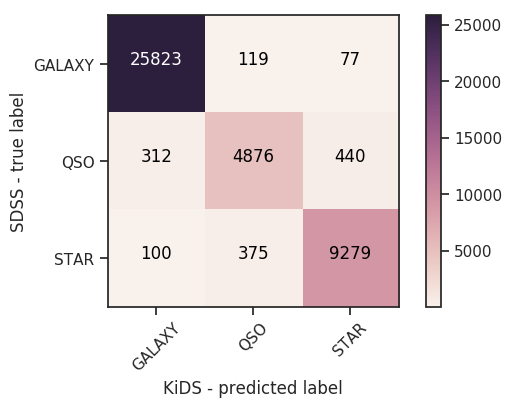

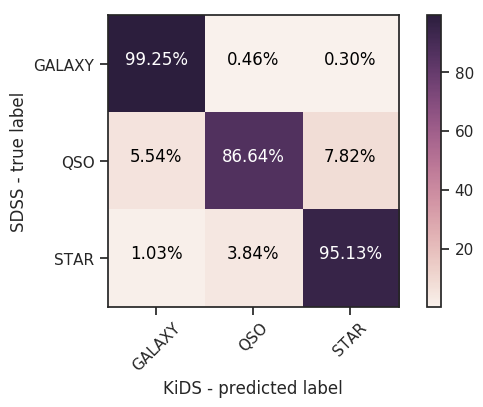

Binary classification results:
Predicted positives: 5370/41401 (12.97%)
logloss = 0.1061
ROC AUC = 0.9853


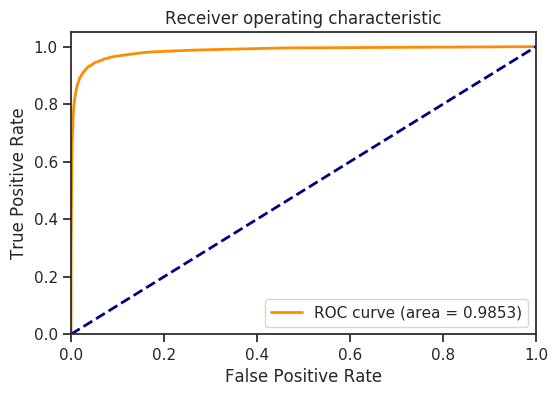

accuracy = 0.9699
f1 = 0.8867
precision = 0.9080
recall = 0.8664


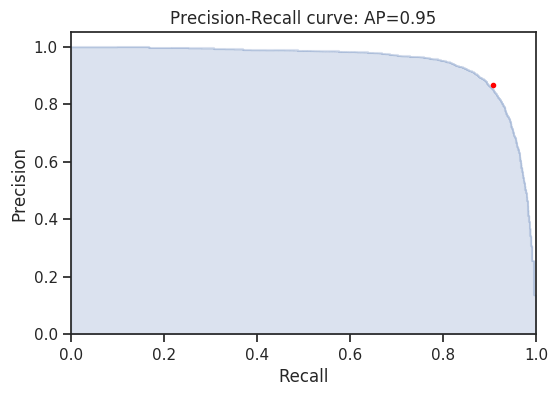

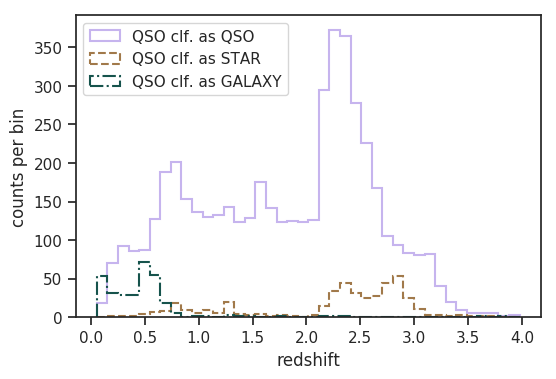

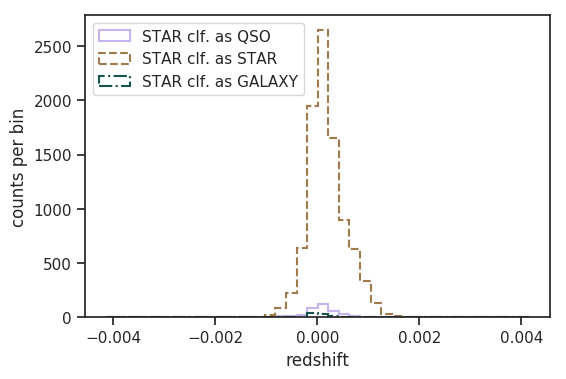

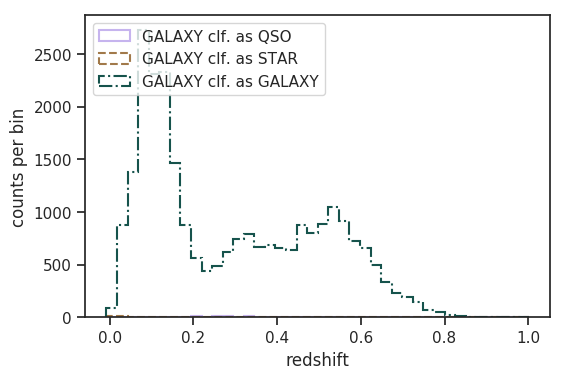

In [6]:
classification_report(predictions, z_max=4, true_label='SDSS')

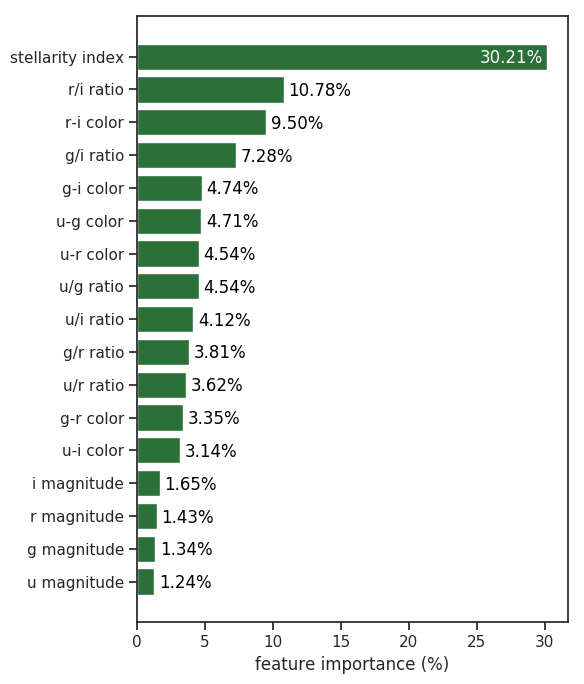

In [7]:
plot_feature_ranking(model, FEATURES['all'])

## No FLAG_BAND, one model, colors and ratios

In [61]:
preds_path = 'outputs/test_preds/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-no-mags_cut-u-g__2018-10-05_15:11:30.csv'
model_path = 'outputs/test_models/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-no-mags_cut-u-g__2018-10-05_15:11:30.joblib'

In [62]:
predictions = pd.read_csv(preds_path)
model = joblib.load(model_path) 

Multiclass classification results:
Accuracy = 0.9634
F1 per class = [ 0.9878  0.8721  0.9457]
Logloss = 0.1543


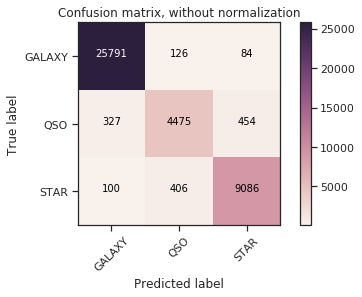

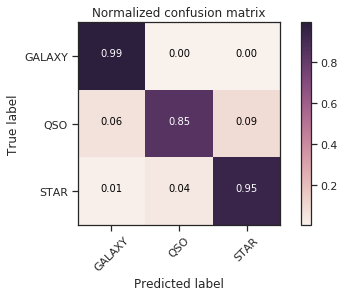

Binary classification results:
Predicted positives: 5007/40849 (12.26%)
logloss = 0.1114
ROC AUC = 0.9831


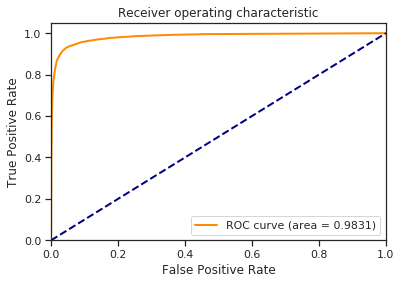

accuracy = 0.9679
f1 = 0.8721
precision = 0.8937
recall = 0.8514


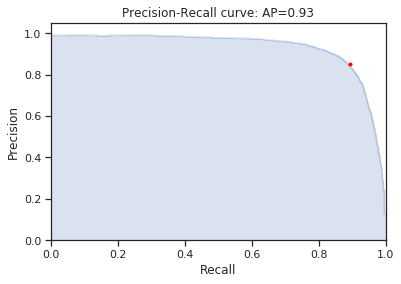

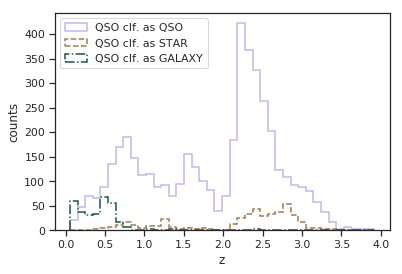

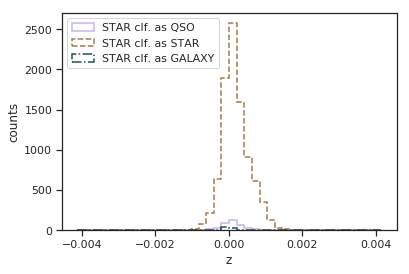

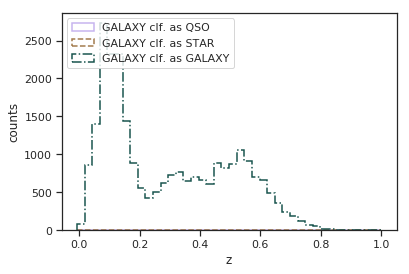

In [63]:
classification_report(predictions, z_max=4)

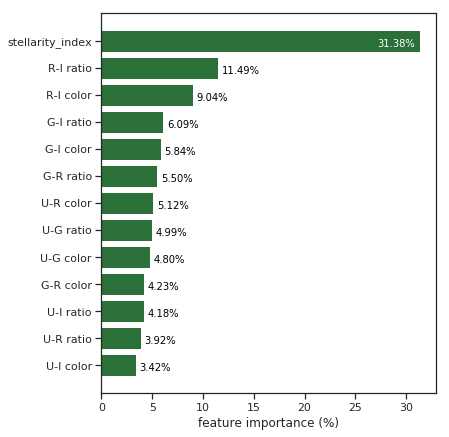

In [64]:
plot_feature_ranking(model, FEATURES['no-mags'])